# Explore here
Dia 1: Planteamiento del problema y recopilación de datos.
El data frame contiene datos de

Recopilación de datos

In [164]:
# Importamos pandas para leer el archivo csv que serán mis datos a trabajar
import pandas as pd
# Importamos sklearn para obtener train_test_split que me servirá para dividir mi data frame en train_data y test_data 80% y 20% respectivamente.
from sklearn.model_selection import train_test_split
total_data = pd.read_csv('../data/raw/internal-link.csv')
train_data, test_data = train_test_split(datos, test_size=0.2, random_state=42)



Planteamiento del problema:
- El data frame muestra alojamientos de New York city obtenidos de una base de datos de airbnb
- El objetivo es crear un modelo predictivo para responder a la siguiente pregunta
- ¿Que factores influyen en los precios de los alojamientos de arbnb en New York City

In [165]:
# Hecho un vistazo a data frame usando head() para ver las primeras 5 lineas y columnas.
train_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
32645,25674366,Mid Century Modern Williamsburg Condo,9038810,Sanjay,Brooklyn,Williamsburg,40.71577,-73.95530,Entire home/apt,295,3,11,2019-05-16,0.87,1,1
23615,19100971,Spacious Bedroom with lots of Natural Light,81745867,Jacqueline,Manhattan,Washington Heights,40.84917,-73.94048,Private room,70,2,2,2018-06-25,0.16,1,0
31183,24209867,Spacious Room in Clinton Hill/Bed-Stuy,1218837,Diana,Brooklyn,Bedford-Stuyvesant,40.68993,-73.95947,Private room,58,2,0,NaN,NaN,2,0
29260,22451798,Historic Bed Stuy Charmer! Entire Apartment!,4126686,Michael,Brooklyn,Bedford-Stuyvesant,40.68427,-73.93118,Entire home/apt,75,3,87,2019-07-05,4.91,1,267
7275,5344850,Cozy room 15 min from Manhattan,27698133,Jakub,Queens,Woodside,40.74705,-73.89564,Private room,38,5,13,2018-12-18,0.25,1,0


# Paso 2: Exploracion y limpieza de datos

In [166]:
# Observo las dimensiones de mi data frame: (48895, 16)
total_data.shape

(48895, 16)

In [167]:
# Ahora exploro las dimensiones de mi train data: (39116, 16)
train_data.shape

(39116, 16)

In [168]:
# Ahora exploro las dimensiones de mi test data: (9779, 16)
test_data.shape

(9779, 16)

In [169]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Ahora que conosco las dimensiones y tipos de valores de mi data frame, buscare valores nulos de los cuales los siguientes contienen valores nulos:
- last_review                     38843 non-null
- reviews_per_month               38843 non-null

In [170]:
# Busco elementos duplicados ignorando la columna id.
# Obteniendo 0 elementos duplicados.
columnas_a_verificar = total_data.columns.difference(['id'])
duplicados = total_data.duplicated(subset= columnas_a_verificar).sum()
print(f"total de elementos {len(total_data)}, duplicados: {duplicados}")

total de elementos 48895, duplicados: 0


Eliminación de información irrelevante.
- En este caso se detectaron las siguientes columnas como aquellas que no aportaran información relevante para entrenar al modelo
- id, name, host_id, host_name, last_review

In [171]:
# usando drop elimino las columnas que no necesitaré, y posterior hecho un vistazo a mi nuevo data frame usando head().
total_data.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1, inplace=True)
total_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Paso 3: Analisis de variables univariante.


Analisis sobre variables categoricas.
- las variables categoricas de mi data set son:
- neighbourhood_group, neighbourhood, room_type.

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_9172\2008382516.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x=top_10_neighbourhoods.values, y=top_10_neighbourhoods.index, palette='viridis')


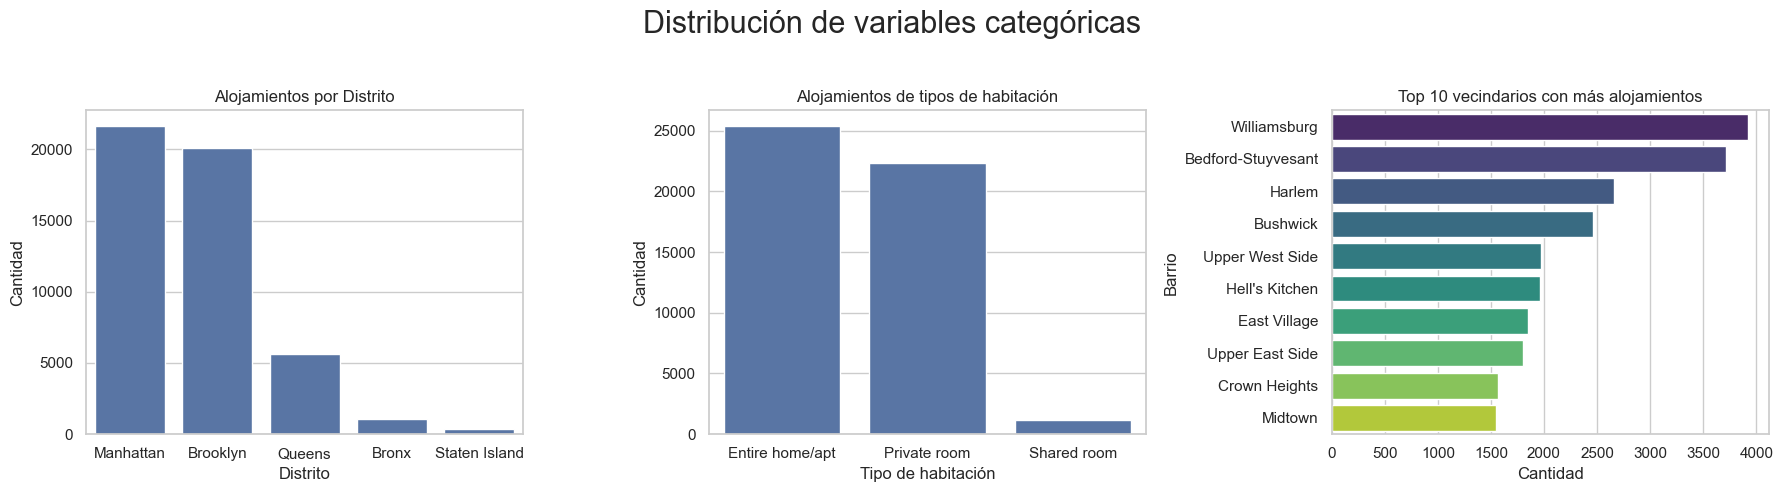

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
# Estilo de mi set de graficos
sns.set(style="whitegrid")
# Tamaño de los gráficos, en este caso creare 3 para mis 3 variables categóricas
fig, axes = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle("Distribución de variables categóricas", fontsize=22)
# Grafico 1: neighbourhood_group
sns.countplot(ax=axes[0], data=df, x='neighbourhood_group', order=total_data['neighbourhood_group'].value_counts().index)
axes[0].set_title('Alojamientos por Distrito')
axes[0].set_xlabel('Distrito')
axes[0].set_ylabel('Cantidad')

# Grafico 2: room_type
sns.countplot(ax=axes[1], data= total_data, x='room_type',
              order=total_data['room_type'].value_counts().index)
axes[1].set_title('Alojamientos de tipos de habitación')
axes[1].set_xlabel('Tipo de habitación')
axes[1].set_ylabel('Cantidad')

# Grafico 3: neighbourhood
# Esta columna contiene demasiados vecindarios, asi que limite los gráficos a los 10 mas populares
top_10_neighbourhoods = total_data['neighbourhood'].value_counts().head(10)
sns.barplot(ax=axes[2], x=top_10_neighbourhoods.values, y=top_10_neighbourhoods.index, palette='viridis')
axes[2].set_title('Top 10 vecindarios con más alojamientos')
axes[2].set_xlabel('Cantidad')
axes[2].set_ylabel('Barrio')

# Ajusto los graficos para que no se acoplen y se visualicen de mejor manera
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



# Conclusiones de variables categoricas
- Alojamientos por distrito (columna:neighbourhood_group)(gráfico 1): Manhattan domina con mas de 20000 de personas que se alojan en ese distrito, seguido de Broolkyn
- Alojamientos de tipos de habitación (columna:room_type)(gráfico 2): Vemos que la mayor parte de la población 25000 se alojan eligen habitación completa(entire home/apt), en segundo lugar tenemos que más de 22000 aproximadamente eligen habitacón privada(private room)
- Alojamientos por vecindario(columna: neighbourhood)(gráfico 3): En este apartado realizamos un recorte ya que existen muchos vecindarios en el data frame, por lo que nos quedamos con los 10 mas populares, y concluimos que los vecindario más solicitados es Williamsburg y Bedford-Stuyvesant con mas de 1500 de población de diferencia del resto de vecindarios.

Analisis de variables numericas:
- las columnas que obtenemos con valores medibles y que nos interesan para entrenar nuestro modelo son:
- price, minimum_nights, number_of_reviews y availability_365.
- price: representa el precio muy relevante para entrenar el modelo
- minimun_nights: minimo de noches nos sirve para determinar el precio con respecto a las noches de hospedaje.
- number_of_reviews: Numero de reseñas util para determinar aquellas que recibieron más reseñas y compararlas para ver si son relevantes con el precio.
- availability_365: disponibilidad 365 del año, muy probablemente pueden tener relevancia con respecto al precio.

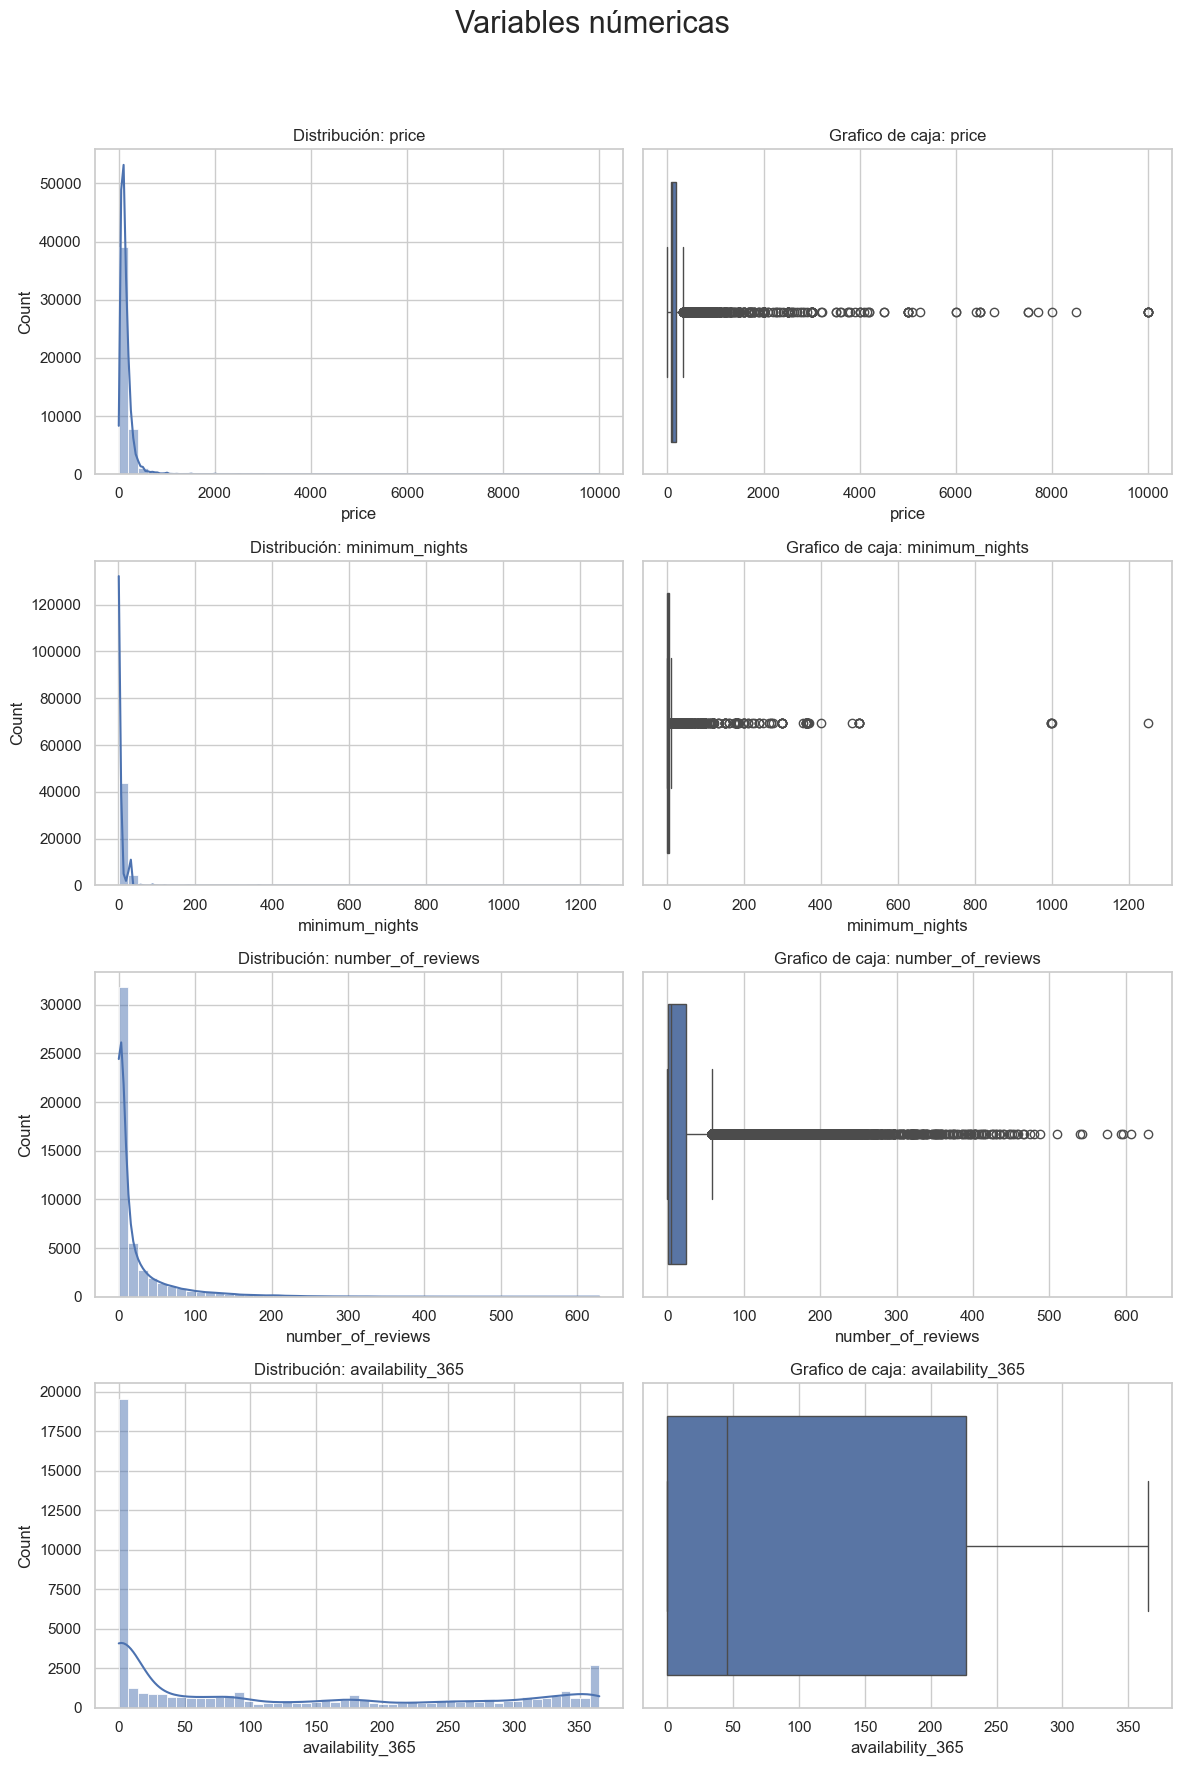

In [173]:
# Selecciono las columnas que me interesan
columnas_numericas = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']
# Establesco las dimensiones de mis graficos
fig, axes = plt.subplots(len(columnas_numericas), 2,  figsize=(12,18))
fig.suptitle("Variables númericas", fontsize=22)
for i, col in enumerate(columnas_numericas):
    # Genero histogramas iterando sobre cada columna.
    sns.histplot(ax=axes[i, 0], data= total_data, x=col, bins=50, kde=True)
    axes[i, 0].set_title(f"Distribución: {col}")



    sns.boxplot(ax=axes[i, 1], data=total_data, x=col)
    axes[i, 1].set_title(f"Grafico de caja: {col}")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Analisis de variables numericas:
- Ahora que tenemos una representación visual de la distribución y un grafico de cajas, podemos observar valores outliers, y concentrarnos en los valores dentro de los parametros normales oh donde se concentran mas lo valores.
- price: Esta columna nos muestra los precios, podemos observar que la mayoria se concentra en valores que van desde 50 a 250 dolares, y el diagrama de cajas nos muestra algunos casos outliers donde los precios puedes ascender hasta los 10,000 dolares!.
- minumun_nights: Esta columna representa las noches que se alojan los visitantes, podemos concluir que la mayoria de población reserva entre
- number of reviews: Esta columna representa el numero de reseñas, es una representación sesgada ya que pocas oh ninguna tiene reseña y algunas tienen cientos de ellas.
- availability_365: Esta columna sería interesante: Obersvamos dos picos: un grupo grande de alojamientos con 0 disponibilidad (quizás ya no están activos o están siempre ocupados) y otro grupo grande con 365 días de disponibilidad (alojamientos dedicados 100% al alquiler turístico)

# Paso 4: Analisis de variables multivariantes

# Relación entre variables numericas (analisis de correlacón)

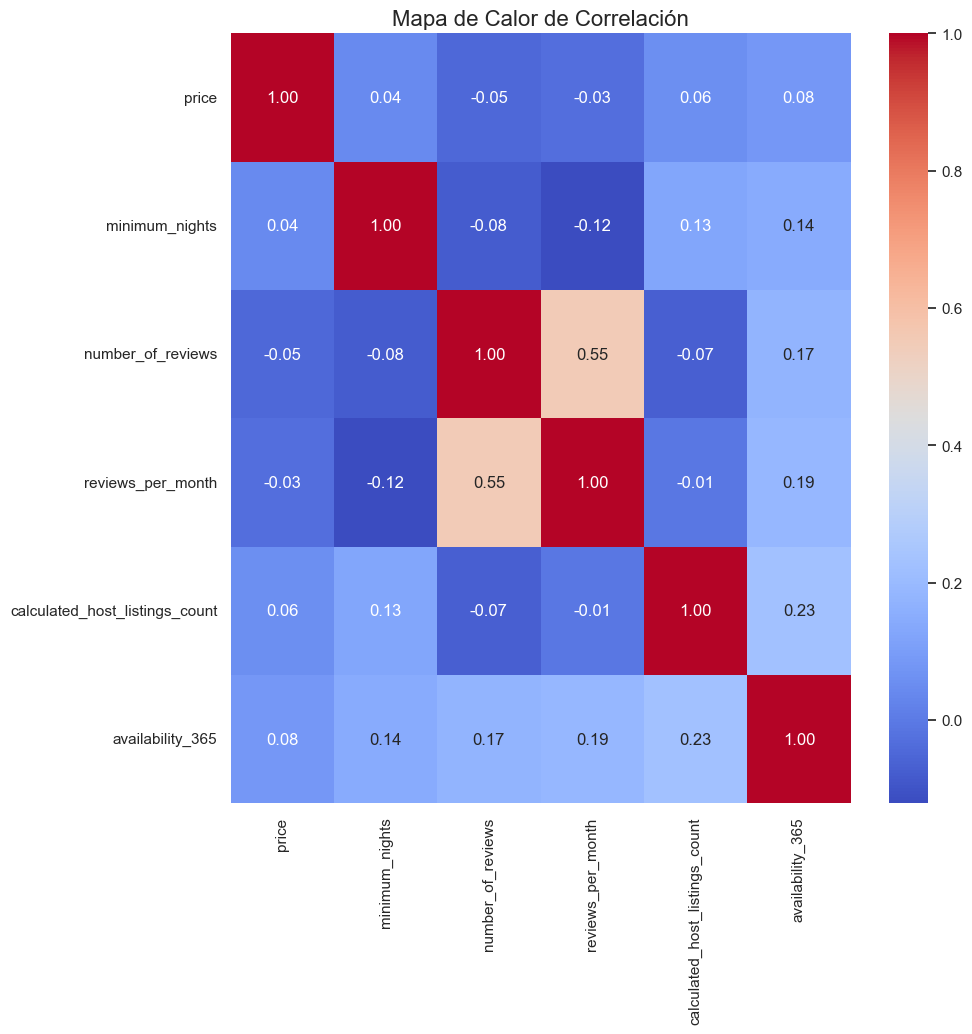

In [174]:
# Relación entre las variables numericas, con el gráfico busco responder a la pregunta si tienen relación alguna variable con la variable objetivo en este caso el precio, usaré un mapa de calor de correlación heatmap

# Dimensiones del gráfico:
plt.figure(figsize=(10,10))
# Calculamos la matriz de correlación solo para las columnas numéricas
corr_matrix = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# Dibujamos el mapa de calor de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación', fontsize=16)
plt.show()

Observamos que nuestras variables numericas por si solas no tiene un impacto importante en el precio, y es de esperar ya que datos como, reseñas, reseñas por mes, disponibilidad no suponen un impacto en el precio.

# Relación de variables categóricas y númericas
- Ahora realizaremos una correlación del precio con las variables categoricas y aqui buscamos encontrar un impacto ya que estas variables almacenan los distritos y vecindarios de New York, donde esperamos un impacto directo debido a la plusvalía, tambien está la variable del estilo de habitacion (room_type) donde será evidente aun mas el impacto ya que el tipo de habitacón aumenta el precio.

Buscaremos responder las siguientes preguntas:
- "¿En qué distrito es, en promedio, más caro alojarse?"

- "¿Cuánto más caro es un apartamento completo que una habitación privada?"

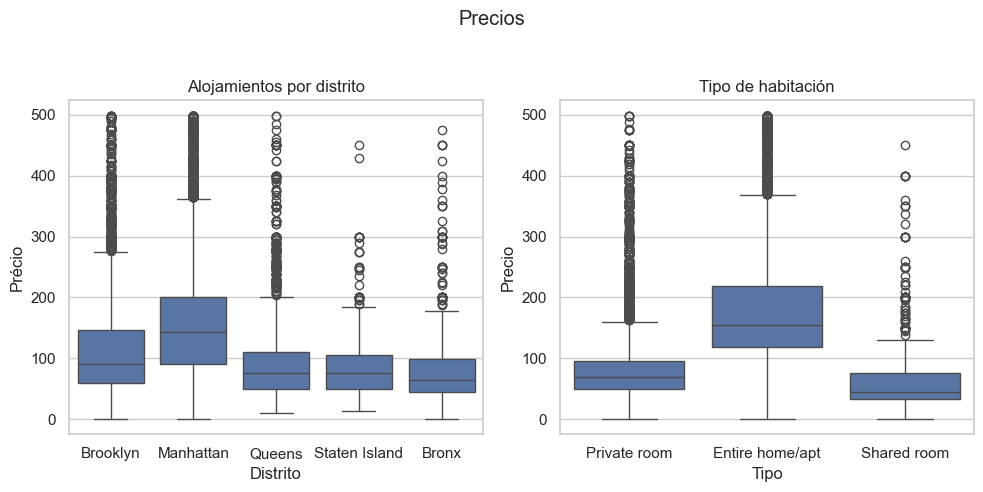

In [175]:
# Creare dos boxplots grafico de cajas para una mejor representación visual
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle("Precios")
# Grafico 1. Relación precio y distrito
sns.boxplot(ax=axes[0], data=total_data[total_data['price'] < 500], x='neighbourhood_group', y='price')
axes[0].set_title('Alojamientos por distrito')
axes[0].set_xlabel('Distrito')
axes[0].set_ylabel('Précio')

# Gráfico 2: Relación entre precio tipo de habitación
sns.boxplot(ax=axes[1], data= total_data[total_data['price'] < 500], x='room_type', y='price')
axes[1].set_title('Tipo de habitación')
axes[1].set_xlabel('Tipo')
axes[1].set_ylabel('Precio')




plt.tight_layout(rect=[0, 0, 1, 0.95])

Concluciones:
- Observamos que Manhattan tiene los mayores precios y a su vez la mayor concentración de visitantes, y en segundo lugar Brooklyn, seguido de Queens: Esto sera relevante para entrenar nuestro modelo ya que observamos que la media de precios es bastante mas cara en relación al resto de distritos.
- En cuanto a estilo de habitación se observa que la la habitacón completa es bastante mas cara que el resto de habitaciones.
- En conclusión estas dos variables impactan directamente en el precio.
- Ya identifique que variables impactan directamente en el precio del arbnb!

# Paso 5: Ingeniería de características

1. Análisis de Outliers (Valores Atípicos)
- Observamos que en algunos casos los precios llegan hasta 10,000 que podrian ser reales, es decir alguna habitacion de lujo oh una mansion.
- Para entrenar al modelo me centrare en la mayor parte de la concentración de los datos

In [176]:
print(f"Precios mayores a 1000 USD: {len(total_data[total_data['price'] >  1000])}")
print(f"Alojamientos que piden mas de 365 como minimo: {len(total_data[total_data['minimum_nights'] > 365])}")

Precios mayores a 1000 USD: 239
Alojamientos que piden mas de 365 como minimo: 14


Puedo deshacerme de estos valores outliers
- Observamos muy pocos casos de precios que superan los 1000 dolares que pueden tener un gran sesgo en nuestro modelo: 239
- También observo muy pocos lugares donde piden un minimo de un año de alojamiento: 14

2. Analisis de valores nulos

In [177]:
# Observo que solo la columna reviews_per_month tiene 10052 valores nulos, los cuales procederé a rellenar con 0
print(total_data.isnull().sum())

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [178]:
# Relleno los valores nulos de reviews_per_month con 0
total_data['reviews_per_month'].fillna(0, inplace=True)
print(total_data.isnull().sum())

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_9172\4238275432.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_data['reviews_per_month'].fillna(0, inplace=True)


3. Transformar texto a numeros utilizando One Hot Encoding utilizando pd.get_dummies()
- Aplico One Hot Encoding para las columnas categoricas: neighbourhood_group y room_type

In [179]:
# Aplico one hot encoding a las columnas agregandoles el prefijo distrito para neighbourhood_group y tipo para room_type
datos_onehot = pd.get_dummies(total_data, columns=['neighbourhood_group', 'room_type'], prefix=['distrito', 'tipo'])
datos_onehot.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distrito_Bronx,distrito_Brooklyn,distrito_Manhattan,distrito_Queens,distrito_Staten Island,tipo_Entire home/apt,tipo_Private room,tipo_Shared room
0,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,False,True,False,False,False,False,True,False
1,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,False,False,True,False,False,True,False,False
2,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,False,False,True,False,False,False,True,False
3,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,False,True,False,False,False,True,False,False
4,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,False,False,True,False,False,True,False,False


In [180]:
# Simplemente observo las columnas nuevas que se han creado
datos_onehot.drop(['neighbourhood'], axis=1, inplace=True)
datos_onehot.head()
## Con esto tengo un data frame con solo valores númericos, para continuar con el siguiente paso.

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distrito_Bronx,distrito_Brooklyn,distrito_Manhattan,distrito_Queens,distrito_Staten Island,tipo_Entire home/apt,tipo_Private room,tipo_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,False,True,False,False,False,False,True,False
1,40.75362,-73.98377,225,1,45,0.38,2,355,False,False,True,False,False,True,False,False
2,40.80902,-73.94190,150,3,0,0.00,1,365,False,False,True,False,False,False,True,False
3,40.68514,-73.95976,89,1,270,4.64,1,194,False,True,False,False,False,True,False,False
4,40.79851,-73.94399,80,10,9,0.10,1,0,False,False,True,False,False,True,False,False


# Paso 6: Selección de caracteristicas

In [181]:
from sklearn.feature_selection import SelectKBest, f_regression
# Me aseguro de que las columnas de coordenadas son numéricas
datos_onehot['latitude'] = pd.to_numeric(datos_onehot['latitude'], errors='coerce')
datos_onehot['longitude'] = pd.to_numeric(datos_onehot['longitude'], errors='coerce')

# 1.- Selecciono la variable objetivo x, y
# X serian todas las columnas excepto el precio
X = datos_onehot.drop(['price'], axis=1)
# Y Seria el precio la variable a predecir
y = datos_onehot['price']
# 2. Configurar el selector para que elija las 8 mejores características
# Usamos f_regression porque nuestro objetivo (precio) es un número continuo.
k_best_selector = SelectKBest(score_func=f_regression, k=8)

# 3. Entreno el selector de nuestros datos con fit
k_best_selector.fit(X, y)

selected_features_mask = k_best_selector.get_support()
selected_cols = X.columns[selected_features_mask]
print(f"Las {len(selected_cols)} características más importantes para predecir el precio son:")
print(list(selected_cols))


Las 8 características más importantes para predecir el precio son:
['longitude', 'calculated_host_listings_count', 'availability_365', 'distrito_Brooklyn', 'distrito_Manhattan', 'distrito_Queens', 'tipo_Entire home/apt', 'tipo_Private room']


In [182]:
# Guardo mi data final con variables numericas en procceced
datos_onehot.to_csv('../data/processed/clean_data_for_model.csv', index=False)